In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.utils import shuffle

/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def normalization(data,tag=""):
    mean = data.mean()
    maximum = data.max()
    minimum = data.min()
    print(tag,mean,maximum,minimum)
    return (data - mean) / (maximum - minimum)

In [3]:
df = pandas.read_csv("index.csv")
df = shuffle(df)
df = shuffle(df)
square = df['square'].values
square = normalization(square)
areas = df['areas'].values / 5
direction = df['direction'].values / 4
price = df['price'].values
#price = normalization(price)

77.68 5233 8


In [4]:
print(areas.shape,square.shape,direction.shape)

(625,) (625,) (625,)


In [5]:
data = np.array([areas,square,direction])
data = data.T
train_fraction = .8
train_number = int(df.shape[0] * train_fraction)
X_train = data[:train_number]
X_test = data[train_number:]
y_train = price[:train_number]
y_test = price[train_number:]

In [6]:
print(np.max(price))

20000


In [6]:
# model
# clf = GridSearchCV(SVR(kernel='rbf', gamma=0.1),{"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},cv=5)
clf = GridSearchCV(LogisticRegression(),{"C":[1e0,1e1,1e2,1e3],"random_state":list(range(10))},cv=5)
#clf = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), {"alpha": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},cv=5)
clf.fit(X_train,y_train)
result = clf.score(X_train,y_train)
test = clf.score(X_test,y_test)

y a solver to silence this warning.
  FutureWarning)
/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

In [7]:
%matplotlib inline

{'C': 10.0, 'random_state': 0} 0.1 0.136
500.0


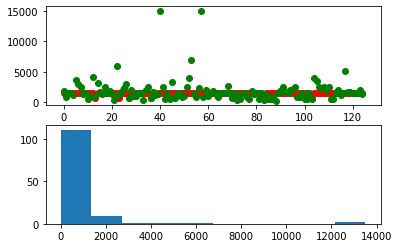

In [8]:
c = clf.best_params_
y = clf.predict(X_test)
x = list(range(len(y)))
plt.subplot(2,1,1)
plt.scatter(x=x,y=y,color='r')
plt.scatter(x=x,y=y_test,color='g')
print(clf.best_params_,result,test)

deviation = y - y_test
deviation = deviation.flatten()
deviation = abs(deviation)
print(np.median(deviation))
plt.subplot(2,1,2)
plt.hist(deviation,10)
joblib.dump(clf,"model2.m")
plt.show()